In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten,
    BatchNormalization
)

from tensorflow.keras.utils import to_categorical

import joblib


In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
X_test = test.values
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train /255
X_test = X_test/255
y_train = to_categorical(y_train)

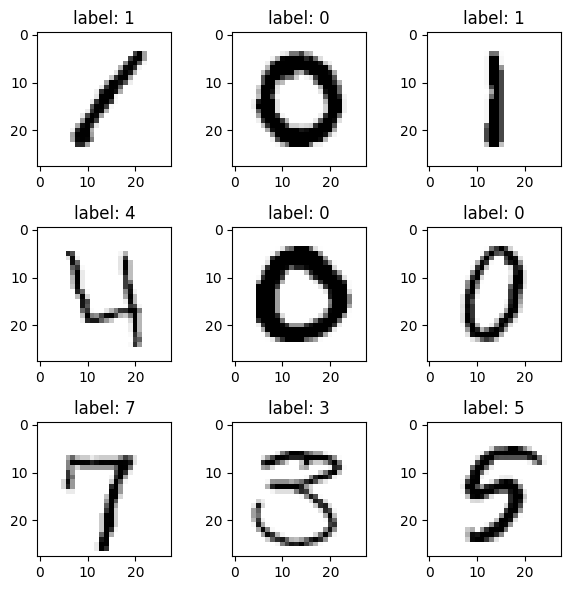

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].squeeze(), cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"label: {digit}")
fig.tight_layout()


In [18]:
def get_model():
    model=Sequential()
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",
input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])
    return model


In [19]:
tf.random.set_seed(0)
model = get_model()
print(model.summary())


C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

None


In [20]:
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs = 10,
    validation_split=.2
)
tf.keras.models.save_model(model,"models/mnist_cnn.h5")
joblib.dump(history.history, "models/mnist_cnn.history")

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 76ms/step - accuracy: 0.9359 - loss: 0.2116 - val_accuracy: 0.8829 - val_loss: 0.3304
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.9854 - loss: 0.0488 - val_accuracy: 0.9796 - val_loss: 0.0793
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9893 - val_loss: 0.0497
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9763 - val_loss: 0.0920
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9880 - val_loss: 0.0497
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.9943 - loss: 0.0155 - val_accuracy: 0.9864 - val_loss: 0.0613
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9851 - val_loss: 0.0766
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.9945 - loss: 0.0170 - 

['models/mnist_cnn.history']

In [21]:
model = tf.keras.models.load_model("models/mnist_cnn.h5")
history = joblib.load("models/mnist_cnn.history")

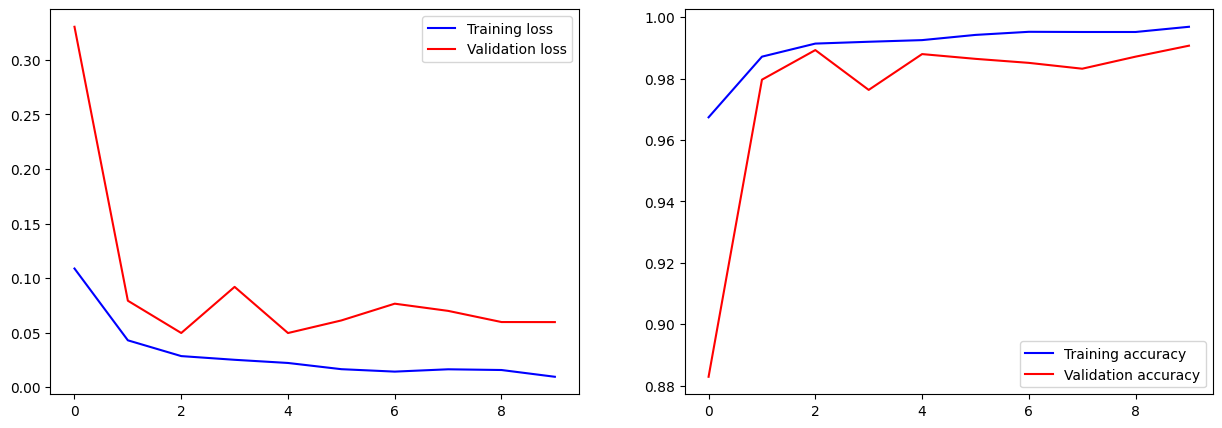

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history['loss'], color='b', label="Training loss")
ax[0].plot(history['val_loss'], color='r', label="Validation loss")
ax[0].legend()
ax[1].plot(history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend()


875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


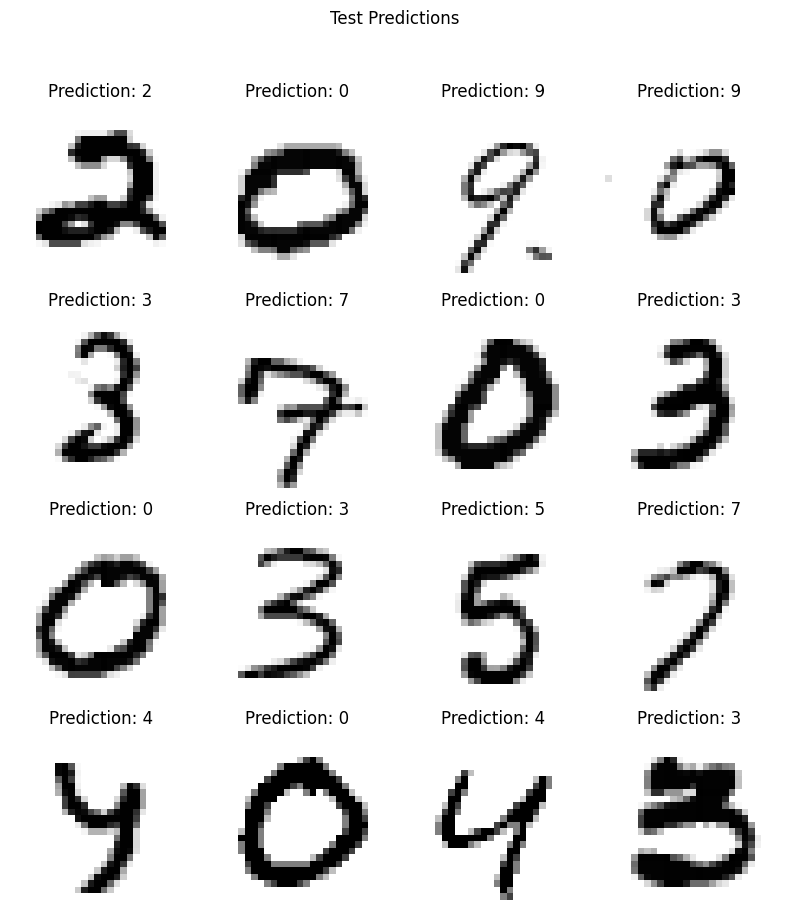

In [28]:
y_pred = model.predict(X_test)
fig, axis = plt.subplots(4, 4, figsize=(8,10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].squeeze(), cmap='binary')
    ax.set(title = f"Prediction: {y_pred[i].argmax()}");
    ax.axis("off")
fig.suptitle("Test Predictions")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
